In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import  LogisticRegression

In [15]:
claimant = pd.read_csv(r"C:\Users\91863\Downloads\claimants.csv")
claimant.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [16]:
## droppping casenum column as it is not required
claimant.drop(["CASENUM"],inplace =True,axis=1)


In [17]:
claimant.head()

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038


In [18]:
## shape of the data set
claimant.shape

(1340, 6)

In [19]:
## removing NA values in data set
claimant=claimant.dropna()
claimant.shape

(1096, 6)

In [20]:
#3 dividing our data into input and output variables

X= claimant.iloc[:,1:]
Y = claimant.iloc[:,0]

In [21]:
# logistic regrssion and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [22]:
# predict for X dataset
y_pred = classifier.predict(X)

In [23]:
y_pred_df = pd.DataFrame({"Actual": Y,"Predicted_prob":classifier.predict(X)})

In [24]:
y_pred_df

,Actual,Predicted_prob
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
1334,1,1
1336,0,0
1337,1,1
1338,0,0


In [25]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix= confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[381 197]
 [123 395]]


In [26]:
((381+395)/(381+197+123+395))*100

70.8029197080292

In [27]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



Text(0, 0.5, 'True positive Rate')

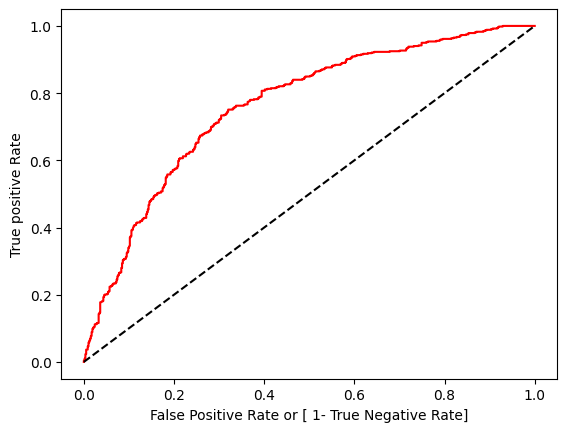

In [28]:
## ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc= roc_auc_score(Y,y_pred)

plt.plot(fpr, tpr, color = "red", label = "logit model (area = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate or [ 1- True Negative Rate]")
plt.ylabel("True positive Rate")

auc =  area under the curve

In [29]:
auc

0.7108589063606365